**Instalação e importação de pacotes**

In [1]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 5.4 MB/s eta 0:00:00


In [3]:
!pip install skimpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 KB 7.0 MB/s eta 0:00:00
  Attempting uninstall: rich
    Found existing installation: rich 13.3.3
    Uninstalling rich-13.3.3:
      Successfully uninstalled rich-13.3.3
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

In [4]:
!python -m spacy download pt_core_news_lg

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-04-04 22:51:25.279063: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 22:51:28.023722: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-04 22:51:33.605167: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the packag

In [5]:
import spacy
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from unidecode import unidecode
import re
from string import punctuation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report 
from math import pi
from skimpy import skim

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Mounted at /content/drive


**Definição de tratamentos para pré-processamento dos dados**

In [6]:
# Carrega o modelo spacy em Portugês
pln = spacy.load('pt_core_news_lg')

In [7]:
# Definição de stopwords
with open('drive/MyDrive/TCC/stop_words.txt') as arq:
    stop = arq.readlines()
stop = [x.rstrip('\n') for x in stop] 

In [8]:
# Definição de expressoes sexualizadas
with open('drive/MyDrive/TCC/expressoes_sexualizadas.txt') as arq:
    termo = arq.readlines()
expressoes_sexualizadas = [x.rstrip('\n') for x in termo] 

In [9]:
# Definição de palavras sexualizadas
with open('drive/MyDrive/TCC/palavras_sexualizadas.txt') as arq:
    termo = arq.readlines()
palavras_sexualizadas = [x.rstrip('\n') for x in termo] 

In [10]:
#Função para pre processamento da base de dados (Limpeza, remoção de stopwords e tokenização dos dados)
def preprocessamentosemreplace(texto):
  
  # Atribui o pacote de pontuações a uma variável
  pontuacoes = string.punctuation
  # Converte em minúsculo
  texto = texto.lower()
  # Remove acentuação
  texto = unidecode(texto)
  # Remove pontuação
  texto = ''.join(x for x in texto if x not in punctuation)
  # Remove números
  texto = ''.join(x for x in texto if not x.isdigit())
  # Remove tags
  texto = re.sub('<[^<]+?>','', texto)

  # Atribui pacote de tratamento de PLN ao texto de entrada a uma variável
  documento = pln(texto)

  # Gera uma lista vazia
  lista = []

  # Quebra o texto de origem em tokens(palavras)
  for token in documento:
    lista.append(token.text)

  #  A lista recebe os tokens que não são stopwords ou espaço em branco
  lista = [palavra for palavra in lista if palavra not in stop and not palavra.isspace()]

  # Converte a lista em uma string
  texto_tratado = ' '.join([str(elemento) for elemento in lista])

  # Retorna o texto tratado
  return texto_tratado


In [11]:
#Função para pre processamento da base de dados (Limpeza, remoção de stopwords e tokenização dos dados)
def preprocessamento(texto):
  
  # Atribui o pacote de pontuações a uma variável
  pontuacoes = string.punctuation
  # Converte em minúsculo
  texto = texto.lower()
  # Remove acentuação
  texto = unidecode(texto)
  # Remove pontuação
  texto = ''.join(x for x in texto if x not in punctuation)
  # Remove números
  texto = ''.join(x for x in texto if not x.isdigit())
  # Remove tags
  texto = re.sub('<[^<]+?>','', texto)

  # Substitui expressoes sexualizadas
  for expressoes in expressoes_sexualizadas:
    texto = texto.replace(expressoes,"sexual")

  # Atribui pacote de tratamento de PLN ao texto de entrada a uma variável
  documento = pln(texto)

  # Gera uma lista vazia
  lista = []

  # Quebra o texto de origem em tokens(palavras)
  for token in documento:
    lista.append(token.text)

  #  A lista recebe os tokens que não são stopwords ou espaço em branco
  lista = [palavra for palavra in lista if palavra not in stop and not palavra.isspace()]
  
  # Substitui palavras sexualizadas
  for index, palavra in enumerate(lista):
    if palavra in palavras_sexualizadas:
      lista[index] = "sexual"

  # Converte a lista em uma string
  texto_tratado = ' '.join([str(elemento) for elemento in lista])

  # Retorna o texto tratado
  return texto_tratado


In [12]:
teste = preprocessamento('Maria foi na rua comprar 1 açucar para sua mãe fazer pudim-.., mas na verdade foi fazer amor, vamos fazer amor,vem me mamar')
teste

'maria rua comprar acucar sua mae fazer pudim mas verdade sexual vamos sexualvem me sexual'

In [13]:
# Função para converter o dataset para binário
def convertebin(data, arquivo):
    db = spacy.tokens.DocBin()
    docs = []
    for doc, label in pln.pipe(data, as_tuples=True):
        doc.cats["SEX"] = label == "sexualizada"
        doc.cats["NEU"] = label == "neutra"
        db.add(doc)
    
    db.to_disk(arquivo)

**Importação e pré processamento da base de dados de teste**


In [14]:
# Importação da base e verificação do tamanho
base_ecad = pd.read_csv('drive/MyDrive/TCC/base_ecad.csv', encoding = 'utf-8')
base_ecad.shape

(380, 5)

[Text(0, 0, '294'), Text(0, 0, '86')]

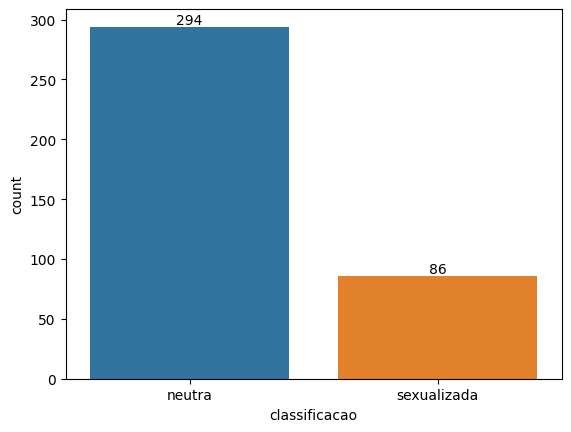

In [15]:
# Verificação gráfica da quantidade de registros por classe (sexualizada ou neutra)
qtd = base_ecad['classificacao'].value_counts().rename_axis('classificacao').reset_index(name='count')
graf = sns.barplot(x='classificacao', y='count', data=qtd)
graf.bar_label(graf.containers[0])

In [16]:
# Aplica a função de pré processamento no campo letra
base_ecad_original = base_ecad['letra'].apply(preprocessamentosemreplace)

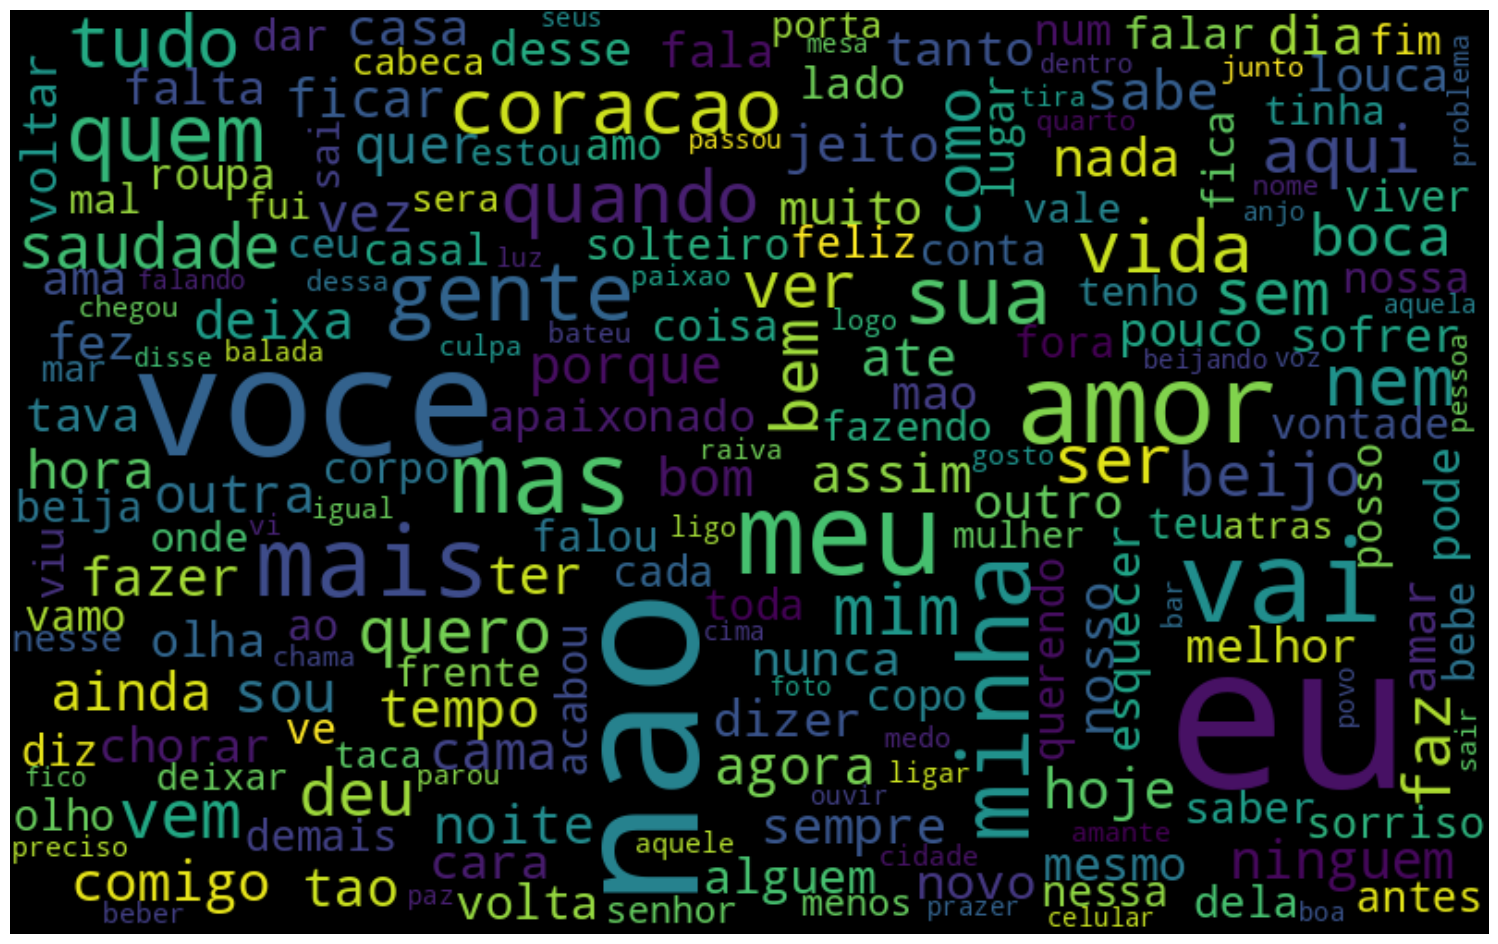

In [17]:
# Gerar nuvem de palavras
palavras_ecad = ' '.join([texto for texto in base_ecad_original])
nuvem_palvras = WordCloud(width= 800, height= 500, max_font_size = 110,collocations = False).generate(palavras_ecad)
plt.figure(figsize=(24,12))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
# Aplica a função de pré processamento no campo letra
base_ecad['letra'] = base_ecad['letra'].apply(preprocessamento)
# Visualização dos primeiros registros da base
base_ecad.head()

musica                                       compositores  \
0                Gatilho               Matheus/Gabriel Angelo/Felipe Marins   
1         Insubstituivel                           Raphael Lucas/Davi Jonas   
2  Tem cabaré essa noite  Flavinho do Kadet/Geoffrey R Rojas/D Lesly D L...   
3       Evento cancelado  Flavinho do Kadet/Edson Garcia/Cris Ribeiro/Lu...   
4          Paga de louca  Waleria Leao/Marcello Henrique/Felipe Araujo/K...   

  idioma classificacao                                              letra  
0     PT        neutra  me chamaram sair hoje eu morrendo vontade fala...  
1     PT        neutra  agora acorda despertador comprou edredom aquec...  
2     PT   sexualizada  cabare noite cabare cabare noite noite noite c...  
3     PT        neutra  eu quietasse boca evitava choro cheiro alcool ...  
4     PT        neutra  dilsinho seguinte conta vai umas pouco mandou ...

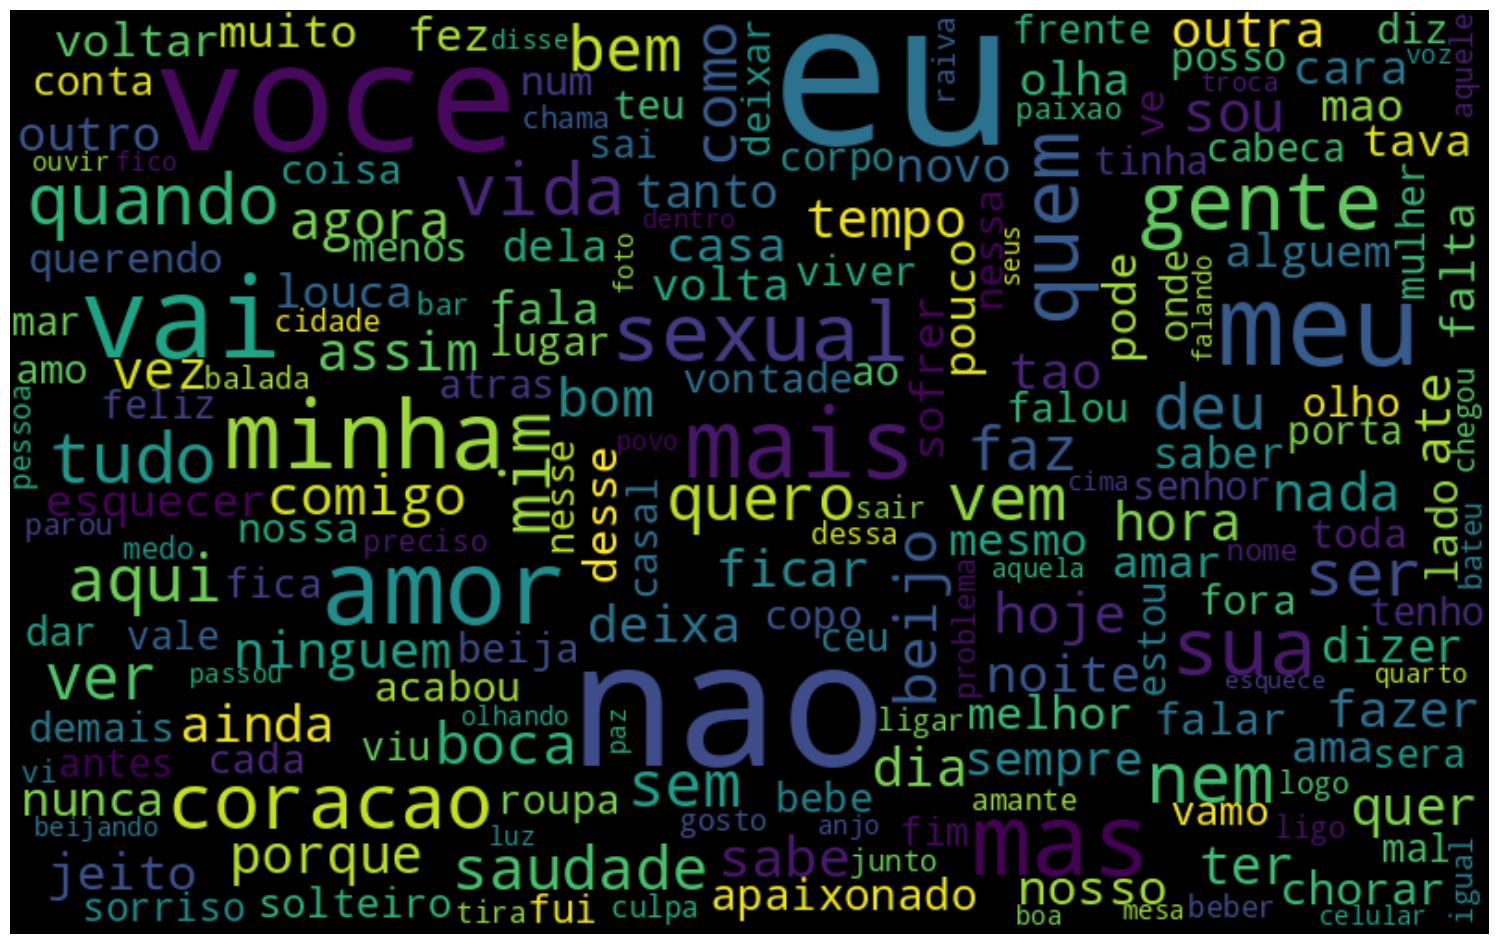

In [19]:
# Gerar nuvem de palavras
palavras_ecad = ' '.join([texto for texto in base_ecad['letra']])
nuvem_palvras = WordCloud(width= 800, height= 500, max_font_size = 110,collocations = False).generate(palavras_ecad)
plt.figure(figsize=(24,12))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
# Gera arquivo 
base_ecad.to_csv('drive/MyDrive/TCC/base_ecad_tratada.csv', sep=',', index = False, encoding='utf-8')

In [21]:
# Conversão do dataset de treinamento para binário
base_teste_tratada = list(base_ecad[["letra", "classificacao"]].sample(frac=1).itertuples(index=False, name=None))
convertebin(base_teste_tratada, "drive/MyDrive/TCC/test.spacy") 

**Aplicação do modelo de classificação**

>**Avaliação do modelo**

In [22]:
# Avaliação do modelo na base ecad
!python -m spacy evaluate drive/MyDrive/TCC/model/model-best/ drive/MyDrive/TCC/test.spacy

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-04-04 22:54:14.196369: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-04 22:54:16.640314: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
ℹ Using CPU

================================== Results ==================================

TOK                 100.00
TEXTCAT (macro F)   78.67 
SPEED               1968  


=========================== Textcat F (per label) ===========================

          P       R       F
SEX   61.90   75.58   68.06
NEU   92.36   86.39   89.28


======================== Textcat ROC AUC (per label) ========================

      ROC AUC
SEX      0.80
NEU      0.80



In [23]:
# Teste de avaliação do modelo
texts = ["vamos ao shopping hoje", "quero ver você pelada na minha cama","vamos fazer amor","quero ir passear com você no parque"]
modelo_pln = spacy.load("drive/MyDrive/TCC/model/model-best")
for text in texts:
    doc = modelo_pln(preprocessamento(text))
    print(doc.cats,  "-",  text)

{'SEX': 0.0002957858960144222, 'NEU': 0.9997041821479797} - vamos ao shopping hoje
{'SEX': 1.0, 'NEU': 5.042699591228939e-10} - quero ver você pelada na minha cama
{'SEX': 1.0, 'NEU': 3.1387754808459567e-12} - vamos fazer amor
{'SEX': 0.001047522877342999, 'NEU': 0.9989525079727173} - quero ir passear com você no parque


In [24]:
base_ecad.head()

musica                                       compositores  \
0                Gatilho               Matheus/Gabriel Angelo/Felipe Marins   
1         Insubstituivel                           Raphael Lucas/Davi Jonas   
2  Tem cabaré essa noite  Flavinho do Kadet/Geoffrey R Rojas/D Lesly D L...   
3       Evento cancelado  Flavinho do Kadet/Edson Garcia/Cris Ribeiro/Lu...   
4          Paga de louca  Waleria Leao/Marcello Henrique/Felipe Araujo/K...   

  idioma classificacao                                              letra  
0     PT        neutra  me chamaram sair hoje eu morrendo vontade fala...  
1     PT        neutra  agora acorda despertador comprou edredom aquec...  
2     PT   sexualizada  cabare noite cabare cabare noite noite noite c...  
3     PT        neutra  eu quietasse boca evitava choro cheiro alcool ...  
4     PT        neutra  dilsinho seguinte conta vai umas pouco mandou ...

In [25]:
# Aplica o mondelo na base do ecad para recuperar a classificação prevista de cada música
modelo_pln = spacy.load("drive/MyDrive/TCC/model/model-best")
for index, texto in base_ecad.iterrows():
    doc = modelo_pln(texto["letra"])
    #print(doc.cats,  "-",  texto)
    prev_sexualizada = format(doc.cats['SEX'], '.5f')
    prev_neutra = format(doc.cats['NEU'], '.5f')
    base_ecad.loc[index,"previsao_sexualizada"] = prev_sexualizada
    base_ecad.loc[index,"previsao_neutra"] = prev_neutra
    if prev_sexualizada >= prev_neutra:
      base_ecad.loc[index,"previsao"] = "sexualizada"
    else:
      base_ecad.loc[index,"previsao"] = "neutra" 

In [26]:
# Métrica de acurácia referente a aplicação do modelo na base de ecad
accuracy_score(base_ecad['classificacao'].values, base_ecad['previsao'].values)

0.8394736842105263

<Axes: >

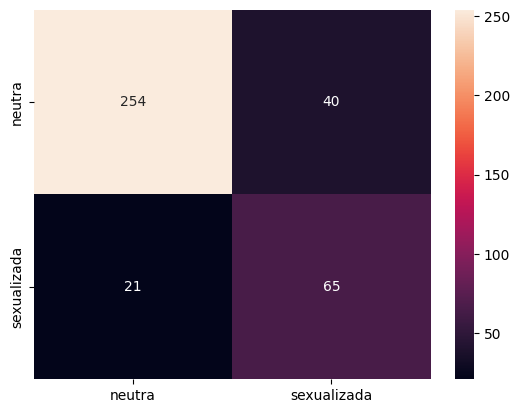

In [27]:
# Matriz de confusão referente a aplicação do modelo na base de ecad
cm_ecad = confusion_matrix(base_ecad['classificacao'].values, base_ecad['previsao'].values)
sns.heatmap(cm_ecad, annot=True, fmt='.3g', xticklabels = ["neutra","sexualizada"], yticklabels = ["neutra","sexualizada"])

In [28]:
# Relatório de métricas referente a aplicação do modelo na base ecad
print(classification_report(base_ecad['classificacao'].values, base_ecad['previsao'].values))

              precision    recall  f1-score   support

      neutra       0.92      0.86      0.89       294
 sexualizada       0.62      0.76      0.68        86

    accuracy                           0.84       380
   macro avg       0.77      0.81      0.79       380
weighted avg       0.85      0.84      0.84       380




**Tratamentos para gerar a base de dados final**

In [29]:
# O ranking do ECAD é publicado nos meses de janeiro, abril, julho e outubro e correpondem ao trimestre de dois trimestre anteriores. 

# Função para converter mês para trimestre correspondente. 
def converte_trimestre(mes,ano):
    switcher = {
    "janeiro":str(int(ano) - 1) + " (3ºtrim)",
		"abril": str(int(ano) - 1) + " (4ºtrim)",
		"julho": ano + " (1ºtrim)",
		"outubro": ano + " (2ºtrim)"
    }
    return switcher.get(mes, "nothing")

# Função para converter ano para o ano correspondente. 
def converte_ano(mes,ano):
    switcher = {
    "janeiro":str(int(ano) - 1),
		"abril": str(int(ano) - 1),
		"julho": ano,
		"outubro": ano
    }
    return switcher.get(mes, "nothing")

In [30]:
# Importação da base do ranking ECAD e verificação do tamanho
base_ranking_ecad = pd.read_csv('drive/MyDrive/TCC/ranking_ecad.csv', encoding='utf-8')
base_ranking_ecad.shape

(1400, 6)

In [31]:
base_ranking_ecad.head()

fonte regiao          periodo  ranking                      musica  \
0  Rádio    Sul  janeiro de 2023        1        Termina comigo antes   
1  Rádio    Sul  janeiro de 2023        2                Haja colirio   
2  Rádio    Sul  janeiro de 2023        3              Erro planejado   
3  Rádio    Sul  janeiro de 2023        4           Vontade de morder   
4  Rádio    Sul  janeiro de 2023        5  Nem namorado e nem ficante   

                                        compositores  
0    Alex/Alex/Bruno Cesar/Cristian Luz/Cristian Luz  
1            Mateus Candotti/Lucas Ing/Wendell Mello  
2  Flavinho do Kadet/Edson Garcia/Nudoze/Felipe K...  
3  Vinicius o Poeta/Shylton/Daniel Caon/Lucas Med...  
4       Rafaela Miranda/Kito/Junior Sillva/Dani Lima

In [32]:
# Merge das bases. A base base_ranking_ecad contém músicas de outros idiomas que não estão sendo contempladas nesta análise.
base_ecad_merge = pd.merge(base_ecad, base_ranking_ecad, on = "musica")
# Definição dos campos relevantes e tratamento dos campos referentes ao período.
for index, texto in base_ecad_merge.iterrows():
  per = str(texto["periodo"]).strip()
  mes,v1,ano = per.split(" ")
  base_ecad_merge.loc[index,"mes"] = mes
  base_ecad_merge.loc[index,"ano"] = ano
base_ecad_prep = base_ecad_merge[["musica","fonte","regiao","ano","previsao","letra"]]
# Definição do campo trimestre
for index, texto in base_ecad_merge.iterrows():
  per = str(texto["periodo"]).strip()
  mes,v1,ano = per.split(" ")
  base_ecad_merge.loc[index,"mes"] = mes
  base_ecad_merge.loc[index,"ano"] = ano
  trimestre = converte_trimestre(mes,ano)
  base_ecad_merge.loc[index,"trimestre"] = trimestre
  base_ecad_merge.loc[index,"ano"] = converte_ano(mes,ano)
base_ecad_prep = base_ecad_merge[["regiao","ano","trimestre","previsao","letra"]]
base_ecad_prep

regiao   ano      trimestre     previsao  \
0         Nordeste  2022  2022 (3ºtrim)       neutra   
1     Centro Oeste  2022  2022 (3ºtrim)       neutra   
2     Centro Oeste  2022  2022 (3ºtrim)       neutra   
3         Nordeste  2022  2022 (3ºtrim)       neutra   
4            Norte  2022  2022 (3ºtrim)       neutra   
...            ...   ...            ...          ...   
1282         Norte  2017  2017 (4ºtrim)       neutra   
1283      Nordeste  2018  2018 (1ºtrim)  sexualizada   
1284         Norte  2018  2018 (1ºtrim)  sexualizada   
1285       Sudeste  2018  2018 (1ºtrim)  sexualizada   
1286      Nordeste  2019  2019 (4ºtrim)  sexualizada   

                                                  letra  
0     me chamaram sair hoje eu morrendo vontade fala...  
1     me chamaram sair hoje eu morrendo vontade fala...  
2     agora acorda despertador comprou edredom aquec...  
3     cabare noite cabare cabare noite noite noite c...  
4     cabare noite cabare cabare noite noite noite c...  
...                                                 ...  
1282  quem poderia imaginar vivo estaria eu contar c...  
1283  vai malandra louca brincando bumbum vai maland...  
1284  vai malandra louca brincando bumbum vai maland...  
1285  vai malandra louca brincando bumbum vai maland...  
1286  eu nao procuro gente nem fala vivendo tao dist...  

[1287 rows x 5 columns]

In [33]:
# Criação das variáveis quantitativas a partir da contagem da variável catégorica previsão
base_sex = base_ecad_prep[(base_ecad_prep.previsao=='sexualizada')]
base_neu = base_ecad_prep[(base_ecad_prep.previsao=='neutra')]
base_agg_reg_sex = base_sex.groupby(["ano","trimestre","regiao"])["previsao"].count().reset_index(name='qtd_sexualizada')
base_agg_reg_neu = base_neu.groupby(["ano","trimestre","regiao"])["previsao"].count().reset_index(name='qtd_neutra')
base_agg_reg = pd.merge(base_agg_reg_sex, base_agg_reg_neu, on = ["ano","trimestre" ,"regiao"])
# Calcula total
for index, texto in base_agg_reg.iterrows():
  total = texto["qtd_sexualizada"] + texto["qtd_neutra"]
  sx= texto["qtd_sexualizada"] / total
  nt = texto["qtd_neutra"] / total
  base_agg_reg.loc[index,"qtd_total"] = total

base_agg_reg.head()

ano      trimestre        regiao  qtd_sexualizada  qtd_neutra  qtd_total
0  2015  2015 (3ºtrim)  Centro Oeste                3           6        9.0
1  2015  2015 (3ºtrim)      Nordeste                3           6        9.0
2  2015  2015 (3ºtrim)         Norte                1           3        4.0
3  2015  2015 (3ºtrim)       Sudeste                2           3        5.0
4  2015  2015 (3ºtrim)           Sul                4           5        9.0

In [34]:
# Gera arquivo com a base ecad final
base_agg_reg.to_csv('drive/MyDrive/TCC/base_ecad_final.csv', sep=',', index = False, encoding='utf-8')

In [35]:
# Estrutura da base
base_agg_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ano              132 non-null    object 
 1   trimestre        132 non-null    object 
 2   regiao           132 non-null    object 
 3   qtd_sexualizada  132 non-null    int64  
 4   qtd_neutra       132 non-null    int64  
 5   qtd_total        132 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 11.3+ KB


In [36]:
# Estatísticas descritivas
base_agg_reg.describe()

qtd_sexualizada  qtd_neutra   qtd_total
count       132.000000  132.000000  132.000000
mean          2.818182    6.477273    9.295455
std           1.294841    1.613237    1.276557
min           1.000000    1.000000    4.000000
25%           2.000000    5.000000    9.000000
50%           3.000000    7.000000   10.000000
75%           4.000000    8.000000   10.000000
max           6.000000    9.000000   11.000000

In [37]:
# Estatísticas descritivas
skim(base_agg_reg)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 132    │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ qtd_sexualizada          │    0 │       0 │     2.8 │    1.3 │    1 │      2 │      4 │       6 │  ▅██▅▃▁  │  │
│ │ qtd_neutra               │    0 │       0 │     6.5 │    1.6 │    1 │      5 │      8 │       9 │   ▁▁█▆▇  │  │
│ │ qtd_total                │    0 │       0 │     9.3 │    1.3 │    4 │      9 │     10 │      11 │     ▁▄█  │  │
│ └──────────────────────────┴──────┴─────────┴─────────┴────────┴──────┴────────┴────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ano                       │       0 │          0 │                            1 │                      130 │  │
│ │ trimestre                 │       0 │          0 │                            1 │                      130 │  │
│ │ regiao                    │       0 │          0 │                            1 │                      130 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

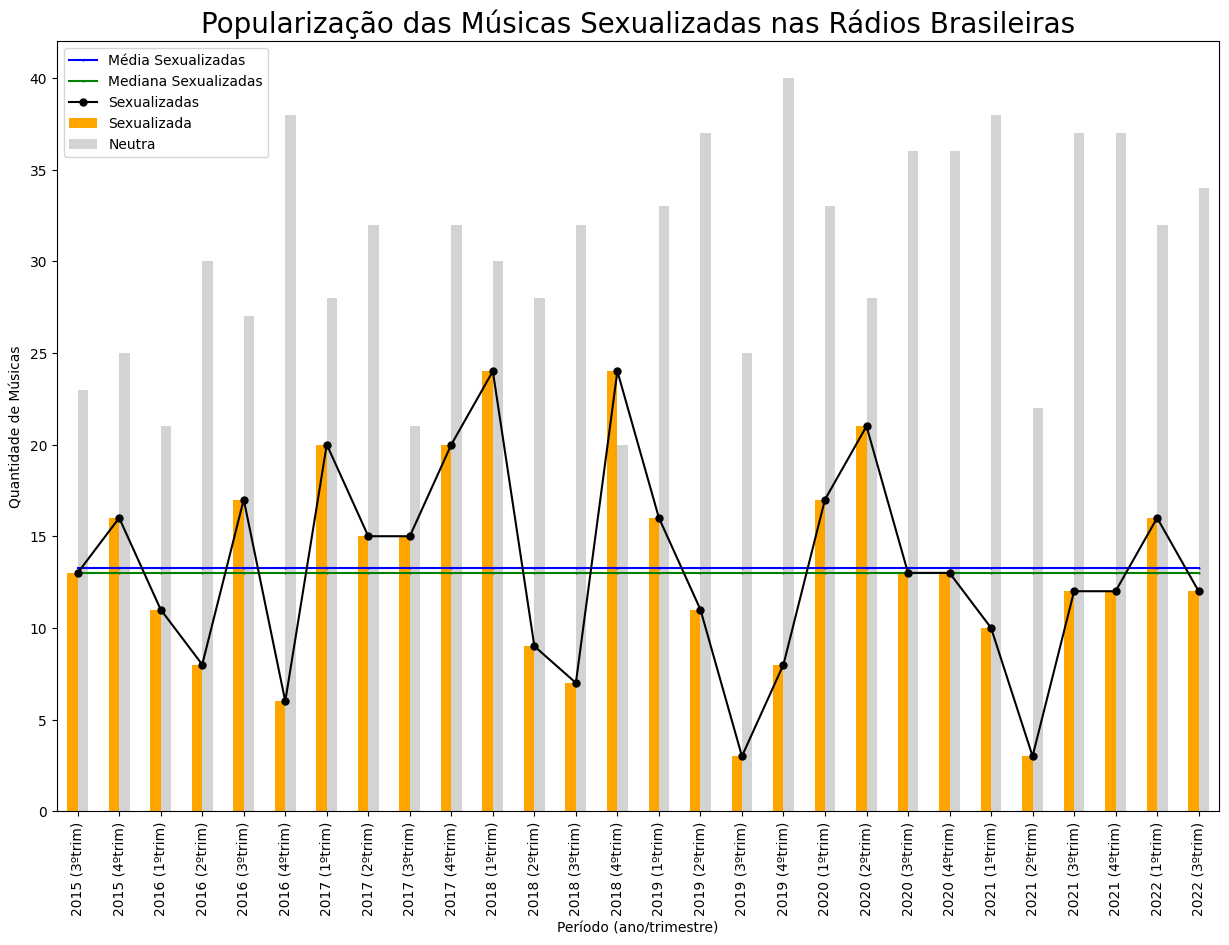

In [38]:
# Representação gráfica nível Brasil da quantidade de músicas sexualizadas e neutras por período
# Agrupa os dados a nível do período
base_agg_sex = base_agg_reg.groupby(["trimestre"])["qtd_sexualizada"].sum().reset_index(name='qtd_sexualizada')
base_agg_neu = base_agg_reg.groupby(["trimestre"])["qtd_neutra"].sum().reset_index(name='qtd_neutra')
base_agg_periodo = pd.merge(base_agg_sex, base_agg_neu, on = "trimestre")
# Calcula a média e mediana da quantidade sexualizada de todo o conjunto de dados
base_agg_media = base_agg_periodo["qtd_sexualizada"].mean()
base_agg_mediana = base_agg_periodo["qtd_sexualizada"].median()
base_agg_periodo["media_sexualizada"] = base_agg_media
base_agg_periodo["mediana_sexualizada"] = base_agg_mediana
# Plota o gráfico da quantidade de músicas sexualizadas e neutras por período
base_agg_periodo.plot(x="trimestre", y=["qtd_sexualizada","qtd_neutra"], kind="bar", color = ["orange","lightgray"], label = ["Sexualizada","Neutra"])
base_agg_periodo["media_sexualizada"].plot(kind='line', marker='.', color='blue', ms=1, label = "Média Sexualizadas")
base_agg_periodo["mediana_sexualizada"].plot(kind='line', marker='.', color='green', ms=1, label = "Mediana Sexualizadas")
base_agg_periodo["qtd_sexualizada"].plot(kind='line', marker='.', color='black', ms=10, label = "Sexualizadas")
width = 0.15
plt.title("Popularização das Músicas Sexualizadas nas Rádios Brasileiras", fontsize = 20)
plt.xlabel("Período (ano/trimestre)")
plt.ylabel("Quantidade de Músicas")
plt.xticks(rotation='vertical')
plt.gcf().set_size_inches(15, 10) 
plt.legend()
plt.plot
plt.savefig("barras_agg_periodo.png")

In [39]:
base_agg_reg.head()

ano      trimestre        regiao  qtd_sexualizada  qtd_neutra  qtd_total
0  2015  2015 (3ºtrim)  Centro Oeste                3           6        9.0
1  2015  2015 (3ºtrim)      Nordeste                3           6        9.0
2  2015  2015 (3ºtrim)         Norte                1           3        4.0
3  2015  2015 (3ºtrim)       Sudeste                2           3        5.0
4  2015  2015 (3ºtrim)           Sul                4           5        9.0

In [40]:
# Calcula a média por ano a nível Brasil 
base_agg_ano_media = base_agg_reg.groupby(["trimestre"])["qtd_sexualizada"].agg('mean').reset_index(name='media_sexualizada')
# Calcula a mediana por ano a nível Brasil 
base_agg_ano_mediana = base_agg_reg.groupby(["trimestre"])["qtd_sexualizada"].agg('median').reset_index(name='mediana_sexualizada')
# Realiza merge dos datasets
base_agg_reg_merge1 = pd.merge(base_agg_reg, base_agg_ano_media, on = ["trimestre"])
base_agg_reg_merge2 = pd.merge(base_agg_reg_merge1, base_agg_ano_mediana, on = ["trimestre"])
base_agg_reg_final = base_agg_reg_merge2[["trimestre","regiao","qtd_sexualizada","qtd_neutra","media_sexualizada","mediana_sexualizada"]]
base_agg_reg_final.head()

trimestre        regiao  qtd_sexualizada  qtd_neutra  \
0  2015 (3ºtrim)  Centro Oeste                3           6   
1  2015 (3ºtrim)      Nordeste                3           6   
2  2015 (3ºtrim)         Norte                1           3   
3  2015 (3ºtrim)       Sudeste                2           3   
4  2015 (3ºtrim)           Sul                4           5   

   media_sexualizada  mediana_sexualizada  
0                2.6                  3.0  
1                2.6                  3.0  
2                2.6                  3.0  
3                2.6                  3.0  
4                2.6                  3.0

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

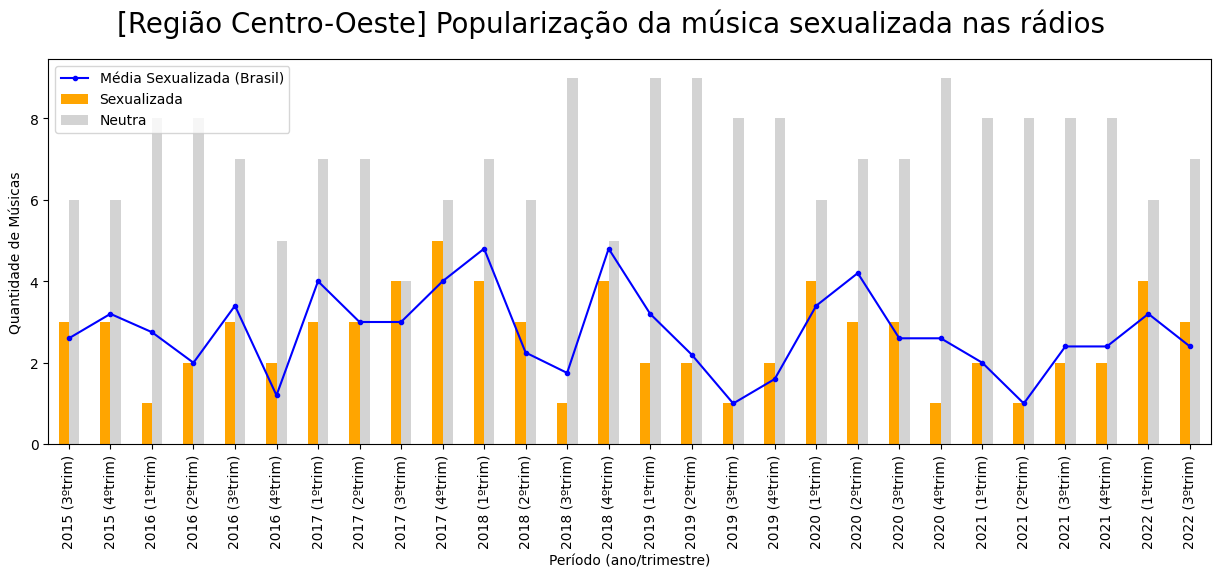

In [41]:
# Plota o gráfico da quantidade de músicas sexualizadas da região Centro-Oeste
base_reg_centro = base_agg_reg_final.query('regiao=="Centro Oeste"')
# Calcula a média da quantidade de músicas sexualizada da região
base_reg_centro.plot(x="trimestre", y=["qtd_sexualizada","qtd_neutra"], kind="bar", color = ["orange","lightgray"], label = ["Sexualizada","Neutra"])
periodo = base_reg_centro["trimestre"].drop_duplicates()
x1 = np.arange(len(periodo))
plt.plot(x1, base_reg_centro["media_sexualizada"], marker='.', color='blue', label='Média Sexualizada (Brasil)')
plt.suptitle("[Região Centro-Oeste] Popularização da música sexualizada nas rádios", fontsize = 20)
width = 0.15
plt.xlabel("Período (ano/trimestre)")
plt.ylabel("Quantidade de Músicas")
plt.xticks(rotation='vertical')
plt.gcf().set_size_inches(15, 5) 
plt.legend(loc='upper left')
plt.subplot()
plt.savefig("barras_Centro-Oeste.png")
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

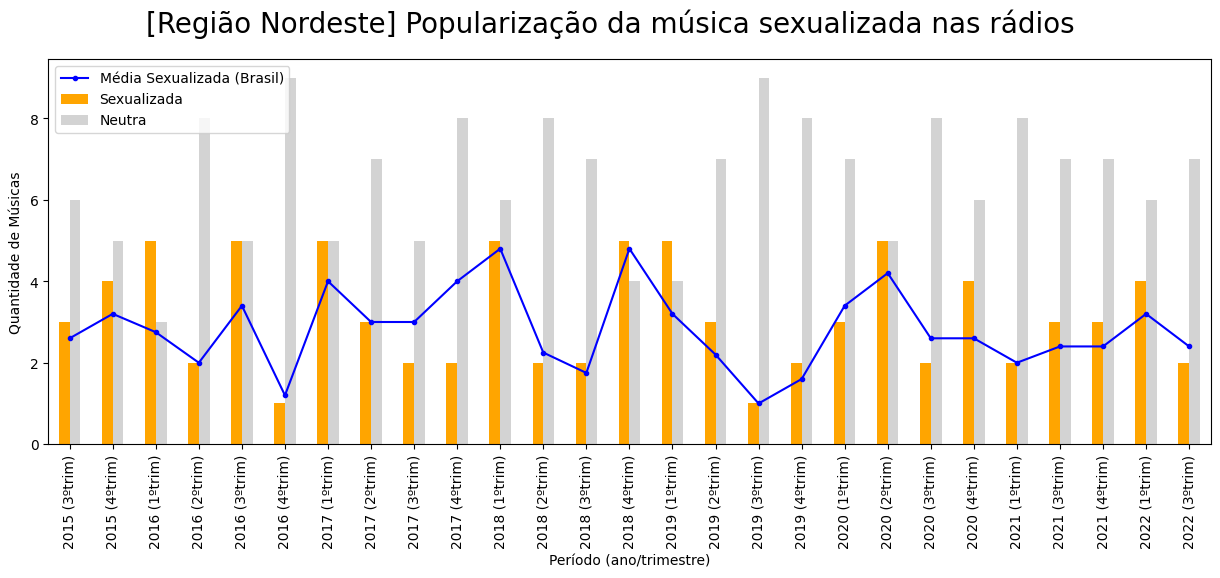

In [42]:
# Plota o gráfico da quantidade de músicas sexualizadas da região Nordeste
base_reg_nordeste = base_agg_reg_final.query('regiao=="Nordeste"')
base_reg_nordeste.plot(x="trimestre", y=["qtd_sexualizada","qtd_neutra"], kind="bar", color = ["orange","lightgray"], label = ["Sexualizada","Neutra"])
periodo = base_reg_nordeste["trimestre"].drop_duplicates()
x1 = np.arange(len(periodo))
plt.plot(x1, base_reg_nordeste["media_sexualizada"], marker='.', color='blue', label='Média Sexualizada (Brasil)')
plt.suptitle("[Região Nordeste] Popularização da música sexualizada nas rádios", fontsize = 20)
width = 0.15
plt.xlabel("Período (ano/trimestre)")
plt.ylabel("Quantidade de Músicas")
plt.xticks(rotation='vertical')
plt.gcf().set_size_inches(15, 5) 
plt.legend(loc='upper left')
plt.subplot()
plt.savefig("barras_Nordeste.png")
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

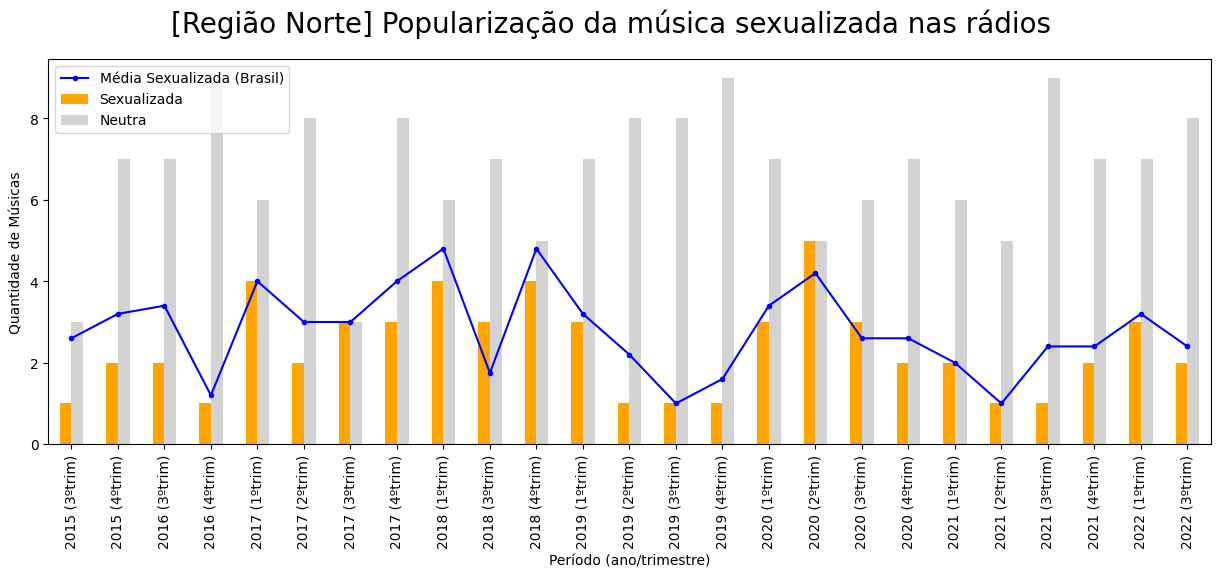

In [43]:
# Plota o gráfico da quantidade de músicas sexualizadas da região Norte
base_reg_norte = base_agg_reg_final.query('regiao=="Norte"')
base_reg_norte.plot(x="trimestre", y=["qtd_sexualizada","qtd_neutra"], kind="bar", color = ["orange","lightgray"], label = ["Sexualizada","Neutra"])
periodo = base_reg_norte["trimestre"].drop_duplicates()
x1 = np.arange(len(periodo))
plt.plot(x1, base_reg_norte["media_sexualizada"], marker='.', color='blue', label='Média Sexualizada (Brasil)')
plt.suptitle("[Região Norte] Popularização da música sexualizada nas rádios", fontsize = 20)
width = 0.15
plt.xlabel("Período (ano/trimestre)")
plt.ylabel("Quantidade de Músicas")
plt.xticks(rotation='vertical')
plt.gcf().set_size_inches(15, 5) 
plt.legend(loc='upper left')
plt.subplot()
plt.savefig("barras_Norte.png")
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

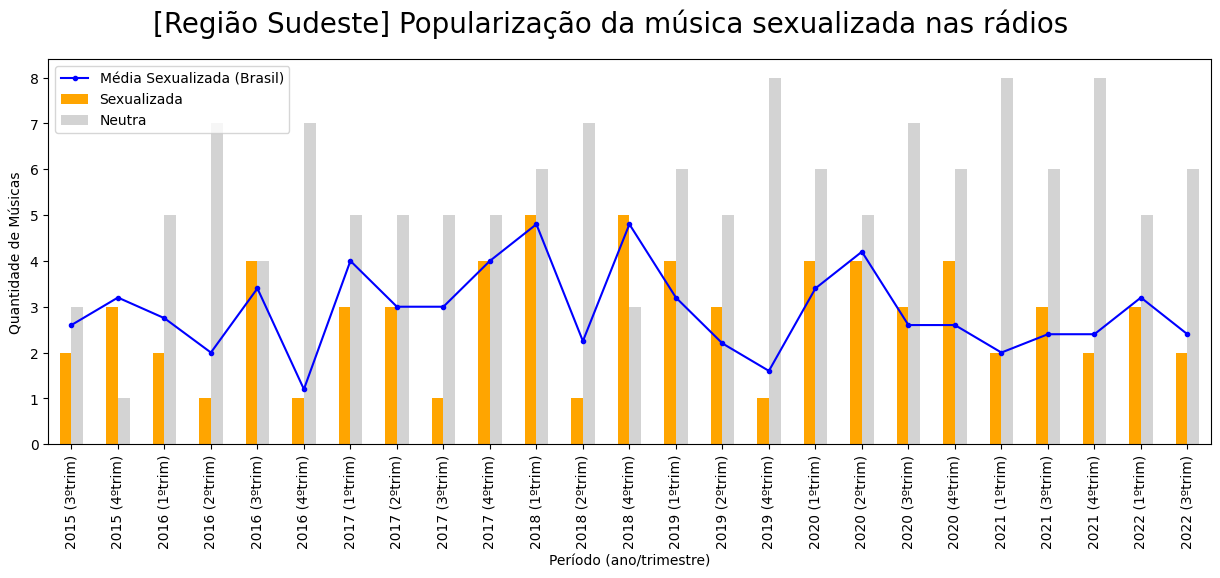

In [44]:
# Plota o gráfico da quantidade de músicas sexualizadas da região Sudeste
base_reg_sudeste = base_agg_reg_final.query('regiao=="Sudeste"')
base_reg_sudeste.plot(x="trimestre", y=["qtd_sexualizada","qtd_neutra"], kind="bar", color = ["orange","lightgray"], label = ["Sexualizada","Neutra"])
periodo = base_reg_sudeste["trimestre"].drop_duplicates()
x1 = np.arange(len(periodo))
plt.plot(x1, base_reg_sudeste["media_sexualizada"], marker='.', color='blue', label='Média Sexualizada (Brasil)')
plt.suptitle("[Região Sudeste] Popularização da música sexualizada nas rádios", fontsize = 20)
width = 0.15
plt.xlabel("Período (ano/trimestre)")
plt.ylabel("Quantidade de Músicas")
plt.xticks(rotation='vertical')
plt.gcf().set_size_inches(15, 5) 
plt.legend(loc='upper left')
plt.subplot()
plt.savefig("barras_Sudeste.png")
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

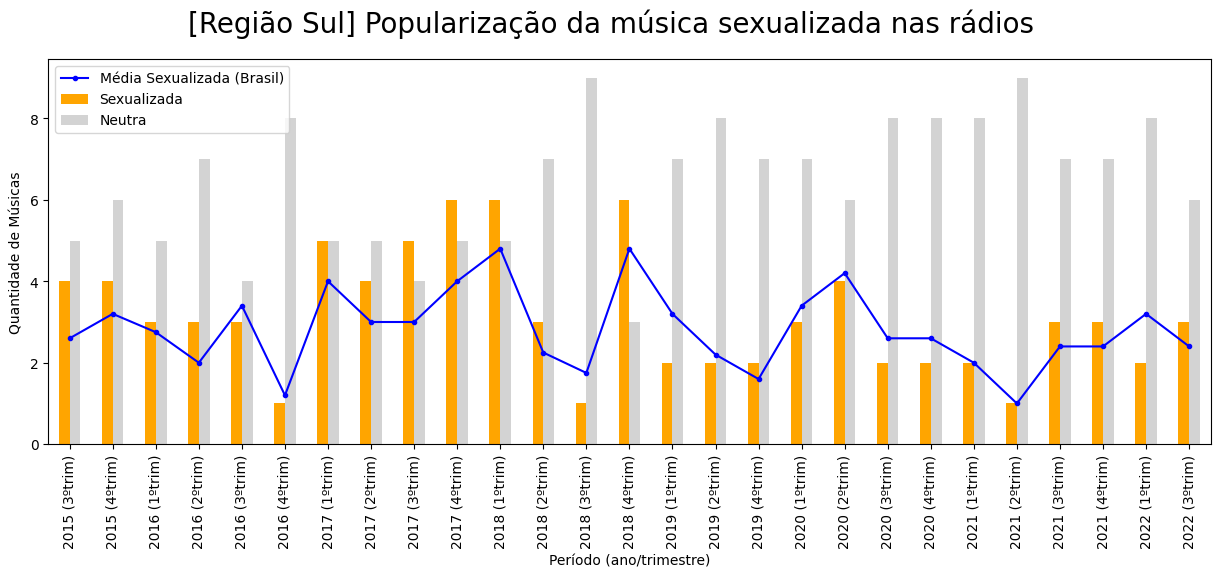

In [45]:
# Plota o gráfico da quantidade de músicas sexualizadas da região Sul
base_reg_sul = base_agg_reg_final.query('regiao=="Sul"')
base_reg_sul.plot(x="trimestre", y=["qtd_sexualizada","qtd_neutra"], kind="bar", color = ["orange","lightgray"], label = ["Sexualizada","Neutra"])
periodo = base_reg_sul["trimestre"].drop_duplicates()
x1 = np.arange(len(periodo))
plt.plot(x1, base_reg_sul["media_sexualizada"], marker='.', color='blue', label='Média Sexualizada (Brasil)')
plt.suptitle("[Região Sul] Popularização da música sexualizada nas rádios", fontsize = 20)
width = 0.15
plt.xlabel("Período (ano/trimestre)")
plt.ylabel("Quantidade de Músicas")
plt.xticks(rotation='vertical')
plt.gcf().set_size_inches(15, 5) 
plt.legend(loc='upper left')
plt.subplot()
plt.savefig("barras_sul.png")
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

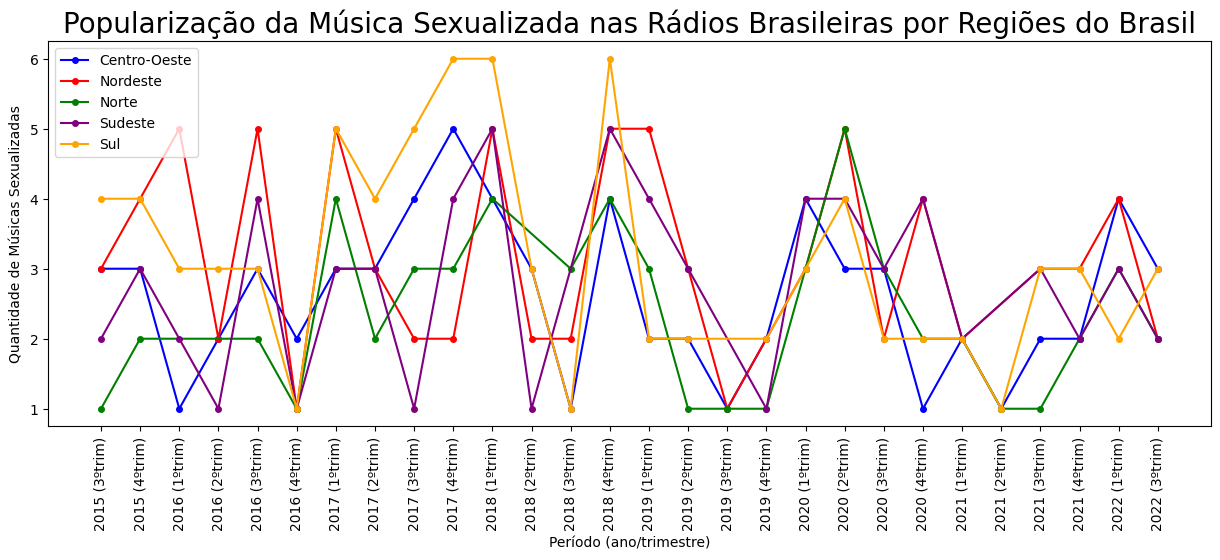

In [46]:
# Gráfico comparação todas as regiões

plt.plot(base_reg_centro['trimestre'], base_reg_centro['qtd_sexualizada'], linestyle='-', color = 'blue', label = "Centro-Oeste", marker='o', markersize = 4)
plt.plot(base_reg_nordeste['trimestre'], base_reg_nordeste['qtd_sexualizada'], linestyle='-', color = 'red', label = "Nordeste", marker='o', markersize = 4)
plt.plot(base_reg_norte['trimestre'], base_reg_norte['qtd_sexualizada'], linestyle='-', color = 'green', label = "Norte", marker='o', markersize = 4)
plt.plot(base_reg_sudeste['trimestre'], base_reg_sudeste['qtd_sexualizada'], linestyle='-', color = 'purple', label = "Sudeste", marker='o', markersize = 4)
plt.plot(base_reg_sul['trimestre'], base_reg_sul['qtd_sexualizada'], linestyle='-', color = 'orange', label = "Sul", marker='o', markersize = 4)

plt.title("Popularização da Música Sexualizada nas Rádios Brasileiras por Regiões do Brasil", fontsize = 20)
width = 0.15
plt.xlabel("Período (ano/trimestre)")
plt.ylabel("Quantidade de Músicas Sexualizadas")
plt.xticks(rotation='vertical')
plt.gcf().set_size_inches(15, 5) 
plt.legend(loc='upper left')
plt.savefig("linhas_regioes.png")
plt.plot

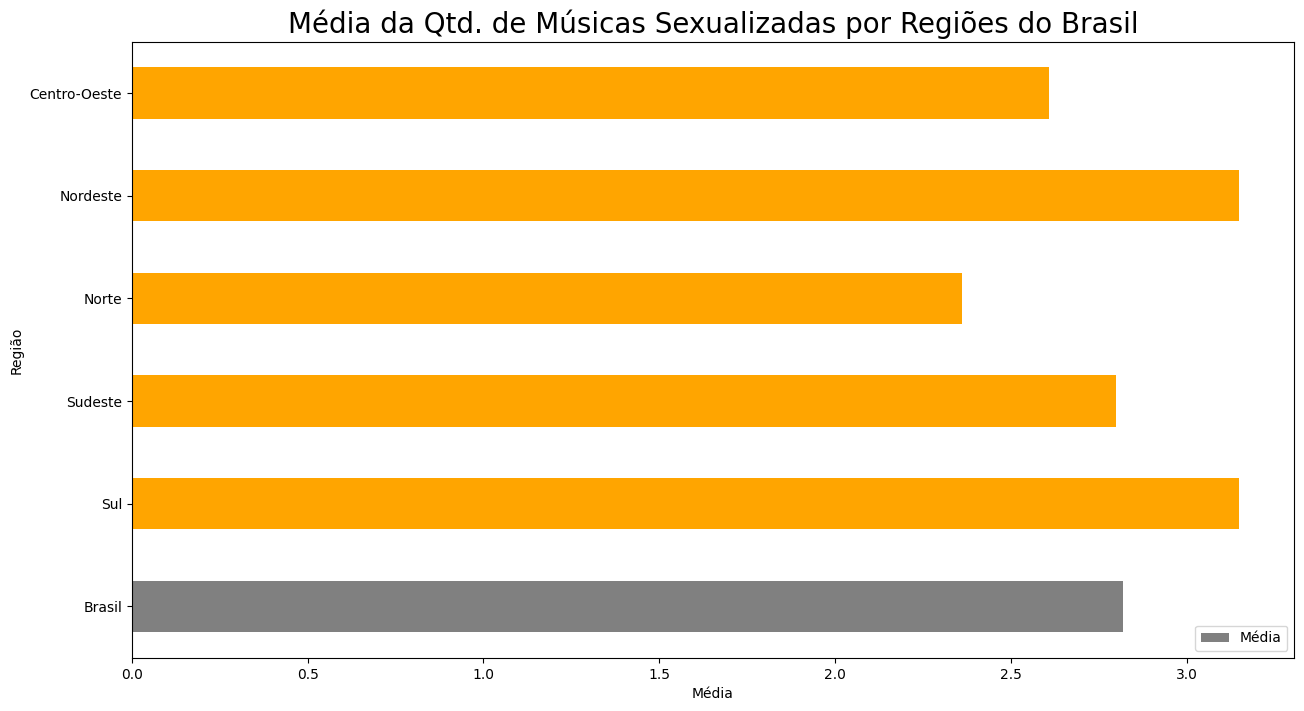

In [47]:
# Gráfico média regiões
base_agg_media_centro = base_reg_centro["qtd_sexualizada"].mean()
base_agg_media_nordeste = base_reg_nordeste["qtd_sexualizada"].mean()
base_agg_media_norte = base_reg_norte["qtd_sexualizada"].mean()
base_agg_media_sudeste = base_reg_sudeste["qtd_sexualizada"].mean()
base_agg_media_sul = base_reg_sul["qtd_sexualizada"].mean()
base_media_geral = base_agg_reg_final["qtd_sexualizada"].mean()

media_regioes = [{"regiao":"Brasil","media_sexualizada":base_media_geral},
                {"regiao":"Sul","media_sexualizada":base_agg_media_sul},
                {"regiao":"Sudeste","media_sexualizada":base_agg_media_sudeste},
                {"regiao":"Norte","media_sexualizada":base_agg_media_norte},
                {"regiao":"Nordeste","media_sexualizada":base_agg_media_nordeste},
                {"regiao":"Centro-Oeste","media_sexualizada":base_agg_media_centro},
]
base_media_regioes = pd.DataFrame(data=media_regioes)

base_media_regioes.plot.barh(x='regiao', y='media_sexualizada', label = "Média", color=['gray', 'orange', 'orange', 'orange', 'orange', 'orange'])
plt.ylabel("Região")
plt.xlabel("Média")
plt.title("Média da Qtd. de Músicas Sexualizadas por Regiões do Brasil", fontsize = 20)
plt.gcf().set_size_inches(15, 8) 
plt.legend(loc=4)
plt.savefig("barras_regioes_media.png")
width = 0.15

**Importação e pré processamento da base de dados de teste**


In [48]:
# Importação da base e verificação do tamanho
base_billboard= pd.read_csv('drive/MyDrive/TCC/base_billboard.csv', encoding = 'utf-8')
base_billboard.shape

(137, 3)

In [49]:
base_billboard.head()

musica                                         interprete  \
0           Malvadao 3                           Xama/ Gustah & Neo Beats   
1            Mal Feito                Hugo & Guilherme E Marilia Mendonca   
2              Malvada                                          Ze Felipe   
3                  212                                             Chefin   
4  Vai La Em Casa Hoje  George Henrique & Rodrigo Featuring Marilia Me...   

                                               letra  
0  Quando eu vi aquela bunda passando na minha fr...  
1  Essa música eu fiz pra você Nem perder seu tem...  
2  Coloca o capacete que lá vem pedrada Chama! Bo...  
3  Aí C essa 'tá braba 'tá quente Mete marcha met...  
4  Vou chamar ela pra ver um filme lá em casa Mal...

In [50]:
# Aplica a função de pré processamento no campo letra
base_billboard_original = base_billboard['letra'].apply(preprocessamentosemreplace)

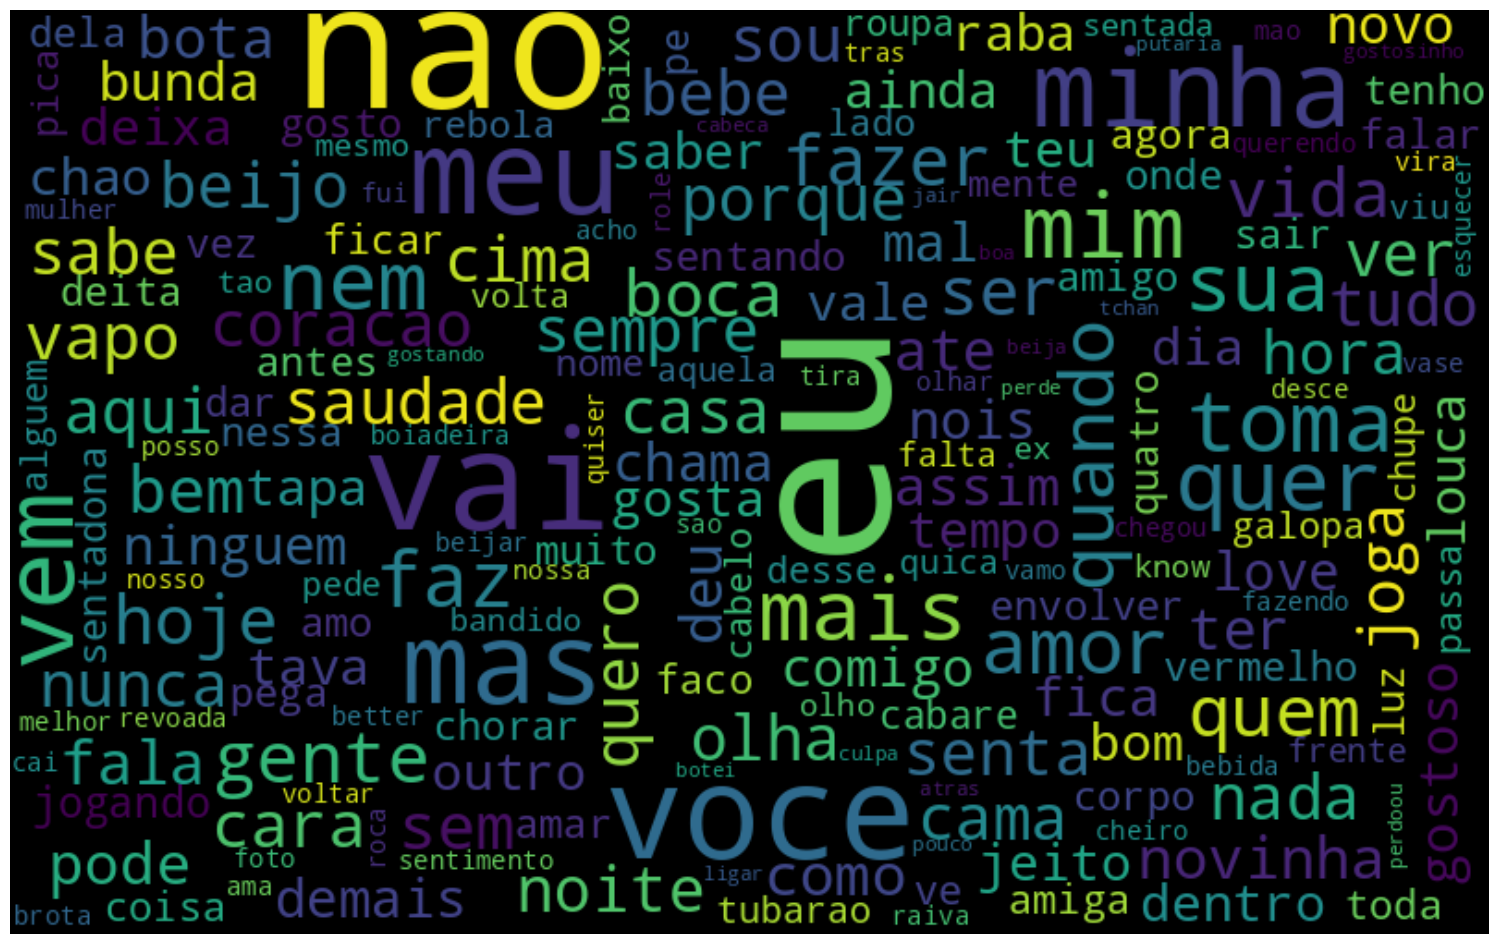

In [51]:
# Gerar nuvem de palavras
palavras_billboard = ' '.join([texto for texto in base_billboard_original])
nuvem_palvras = WordCloud(width= 800, height= 500, max_font_size = 110,collocations = False).generate(palavras_billboard)
plt.figure(figsize=(24,12))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
# Aplica a função de pré processamento no campo letra
base_billboard['letra'] = base_billboard['letra'].apply(preprocessamento)
# Visualização dos primeiros registros da base
base_billboard.head()

musica                                         interprete  \
0           Malvadao 3                           Xama/ Gustah & Neo Beats   
1            Mal Feito                Hugo & Guilherme E Marilia Mendonca   
2              Malvada                                          Ze Felipe   
3                  212                                             Chefin   
4  Vai La Em Casa Hoje  George Henrique & Rodrigo Featuring Marilia Me...   

                                               letra  
0  quando eu vi aquela sexual passando minha fren...  
1  musica eu fiz voce nem perder tempo tentando m...  
2  coloca capacete vem pedrada chama bora bora ho...  
3  c braba quente mete marcha mete marcha chefe f...  
4  chamar ver filme casa mal sabe minha tv estrag...

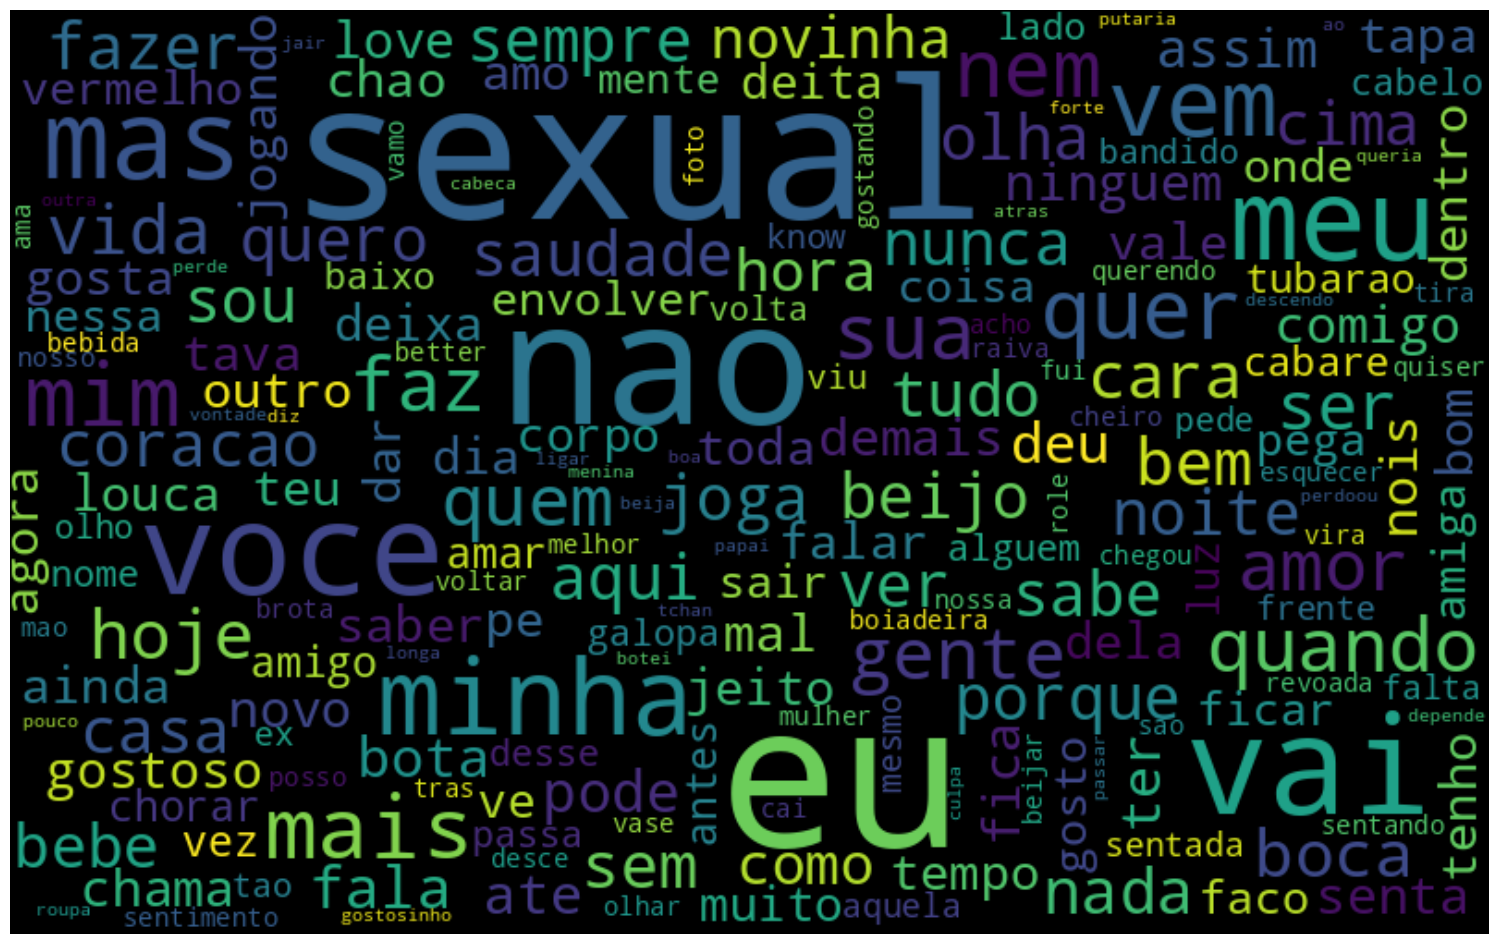

In [53]:
# Gerar nuvem de palavras
palavras_billboard = ' '.join([texto for texto in base_billboard['letra']])
nuvem_palvras = WordCloud(width= 800, height= 500, max_font_size = 110,collocations = False).generate(palavras_billboard)
plt.figure(figsize=(24,12))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
# Aplica o mondelo na base billboard para recuperar a classificação prevista de cada música
modelo_pln = spacy.load("drive/MyDrive/TCC/model/model-best")
for index, texto in base_billboard.iterrows():
    doc = modelo_pln(texto["letra"])
    #print(doc.cats,  "-",  texto)
    prev_sexualizada = format(doc.cats['SEX'], '.5f')
    prev_neutra = format(doc.cats['NEU'], '.5f')
    base_billboard.loc[index,"previsao_sexualizada"] = prev_sexualizada
    base_billboard.loc[index,"previsao_neutra"] = prev_neutra
    if prev_sexualizada >= prev_neutra:
      base_billboard.loc[index,"previsao"] = "sexualizada"
    else:
      base_billboard.loc[index,"previsao"] = "neutra" 

In [63]:
# Importação da base do ranking Billboard e verificação do tamanho
base_ranking_billboard = pd.read_csv('drive/MyDrive/TCC/ranking_billboard_tratado.csv', encoding='utf-8')
base_ranking_billboard.shape

(1475, 4)

In [77]:
# Merge das bases. A base base_ranking_billboard contém músicas de outros idiomas que não estão sendo contempladas nesta análise.
base_billboard_merge = pd.merge(base_billboard, base_ranking_billboard, on = "musica")
# Definição dos campos relevantes e tratamento dos campos referentes ao período.
base_billboard_prep = base_billboard_merge[["musica","data","previsao","letra"]]
# Definição do campo trimestre
for index, texto in base_billboard_merge.iterrows():
  ano = texto["data"][0:4]
  mes = texto["data"][5:7]
  ano_mes = ano +"/"+ mes
  base_billboard_merge.loc[index,"ano"] = ano
  base_billboard_merge.loc[index,"ano_mes"] = ano_mes
base_billboard_prep = base_billboard_merge[["ano","ano_mes","previsao","letra"]]
# Retira registros do trimestre imcompleto
base_billboard_prep = base_billboard_prep.query('ano_mes!="2022/02" and ano_mes!="2023/04"')
base_billboard_prep.head()

ano  ano_mes     previsao  \
2  2022  2022/03  sexualizada   
3  2022  2022/03  sexualizada   
4  2022  2022/03  sexualizada   
5  2022  2022/03  sexualizada   
6  2022  2022/04  sexualizada   

                                               letra  
2  quando eu vi aquela sexual passando minha fren...  
3  quando eu vi aquela sexual passando minha fren...  
4  quando eu vi aquela sexual passando minha fren...  
5  quando eu vi aquela sexual passando minha fren...  
6  quando eu vi aquela sexual passando minha fren...

In [78]:
# Criação das variáveis quantitativas a partir da contagem da variável catégorica previsão
base_sex = base_billboard_prep[(base_billboard_prep.previsao=='sexualizada')]
base_neu = base_billboard_prep[(base_billboard_prep.previsao=='neutra')]
base_agg_bill_sex = base_sex.groupby(["ano","ano_mes"])["previsao"].count().reset_index(name='qtd_sexualizada')
base_agg_bill_neu = base_neu.groupby(["ano","ano_mes"])["previsao"].count().reset_index(name='qtd_neutra')
base_agg_bill = pd.merge(base_agg_bill_sex, base_agg_bill_neu, on = ["ano","ano_mes"])
# Calcula total
for index, texto in base_agg_bill.iterrows():
  total = texto["qtd_sexualizada"] + texto["qtd_neutra"]
  sx= texto["qtd_sexualizada"] / total
  nt = texto["qtd_neutra"] / total
  base_agg_bill.loc[index,"qtd_total"] = total
base_agg_bill

ano  ano_mes  qtd_sexualizada  qtd_neutra  qtd_total
0   2022  2022/03               73          26       99.0
1   2022  2022/04               89          36      125.0
2   2022  2022/05               64          36      100.0
3   2022  2022/06               66          33       99.0
4   2022  2022/07               73          52      125.0
5   2022  2022/08               58          42      100.0
6   2022  2022/09               54          46      100.0
7   2022  2022/10               70          55      125.0
8   2022  2022/11               56          42       98.0
9   2022  2022/12               78          47      125.0
10  2023  2023/01               62          38      100.0
11  2023  2023/02               69          31      100.0
12  2023  2023/03               76          24      100.0

In [79]:
# Estrutura da base
base_agg_bill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ano              13 non-null     object 
 1   ano_mes          13 non-null     object 
 2   qtd_sexualizada  13 non-null     int64  
 3   qtd_neutra       13 non-null     int64  
 4   qtd_total        13 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ KB


In [80]:
# Estatísticas descritivas
base_agg_bill.describe()

qtd_sexualizada  qtd_neutra   qtd_total
count        13.000000   13.000000   13.000000
mean         68.307692   39.076923  107.384615
std           9.809728    9.438057   12.237500
min          54.000000   24.000000   98.000000
25%          62.000000   33.000000  100.000000
50%          69.000000   38.000000  100.000000
75%          73.000000   46.000000  125.000000
max          89.000000   55.000000  125.000000

In [81]:
# Estatísticas descritivas
skim(base_agg_bill)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 13     │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 5      │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ qtd_sexualizada          │    0 │       0 │      68 │    9.8 │   54 │     62 │     73 │      89 │  █▅██▃▃  │  │
│ │ qtd_neutra               │    0 │       0 │      39 │    9.4 │   24 │     33 │     46 │      55 │  ▅▅█▅▅▅  │  │
│ │ qtd_total                │    0 │       0 │     110 │     12 │   98 │    100 │    120 │     120 │  █    ▄  │  │
│ └──────────────────────────┴──────┴─────────┴─────────┴────────┴──────┴────────┴────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ano                       │       0 │          0 │                            1 │                       13 │  │
│ │ ano_mes                   │       0 │          0 │                            1 │                       13 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

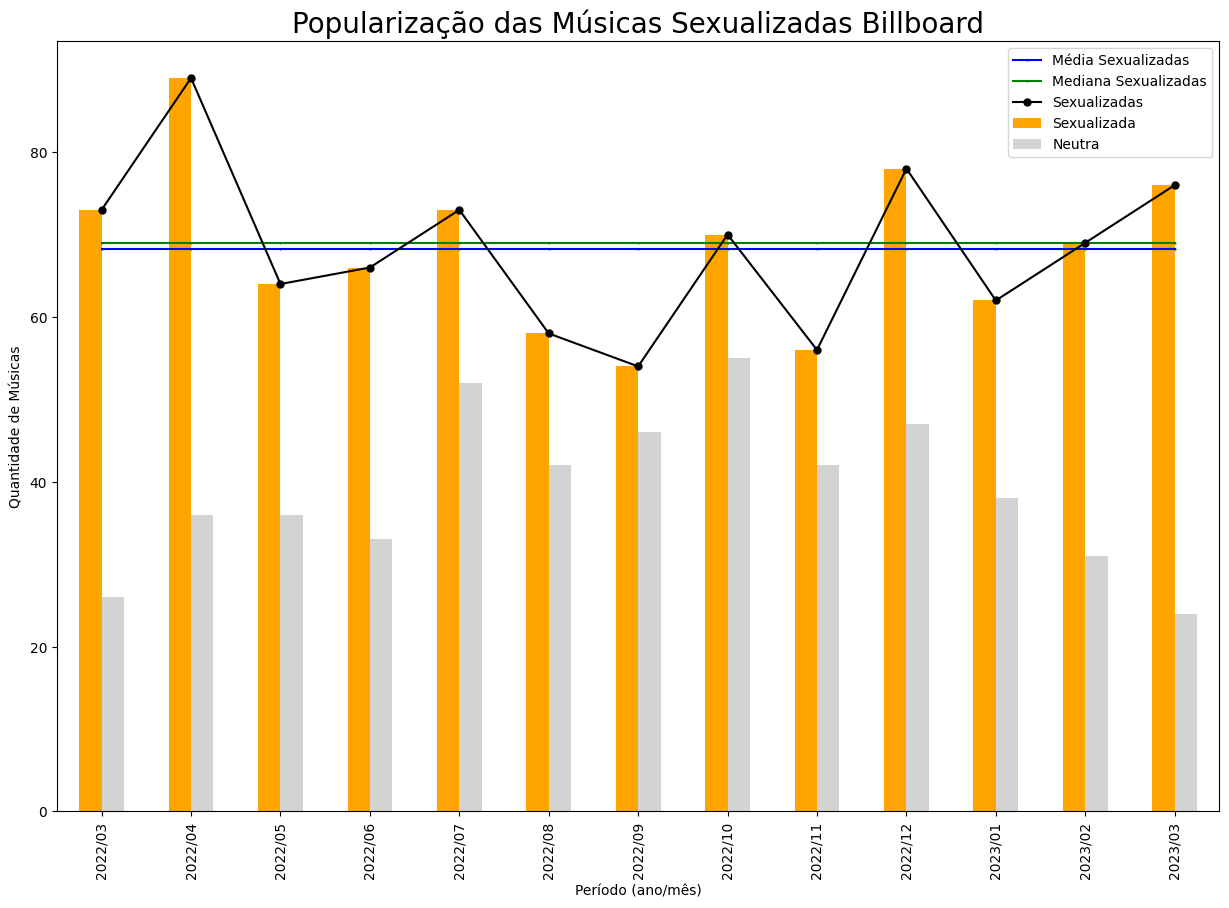

In [82]:
# Representação gráfica nível Brasil da quantidade de músicas sexualizadas e neutras por período
# Agrupa os dados a nível do período
base_agg_sex = base_agg_bill.groupby(["ano_mes"])["qtd_sexualizada"].sum().reset_index(name='qtd_sexualizada')
base_agg_neu = base_agg_bill.groupby(["ano_mes"])["qtd_neutra"].sum().reset_index(name='qtd_neutra')
base_agg_periodo = pd.merge(base_agg_sex, base_agg_neu, on = "ano_mes")
# Calcula a média e mediana da quantidade sexualizada de todo o conjunto de dados
base_agg_media = base_agg_periodo["qtd_sexualizada"].mean()
base_agg_mediana = base_agg_periodo["qtd_sexualizada"].median()
base_agg_periodo["media_sexualizada"] = base_agg_media
base_agg_periodo["mediana_sexualizada"] = base_agg_mediana
# Plota o gráfico da quantidade de músicas sexualizadas e neutras por período
base_agg_periodo.plot(x="ano_mes", y=["qtd_sexualizada","qtd_neutra"], kind="bar", color = ["orange","lightgray"], label = ["Sexualizada","Neutra"])
base_agg_periodo["media_sexualizada"].plot(kind='line', marker='.', color='blue', ms=1, label = "Média Sexualizadas")
base_agg_periodo["mediana_sexualizada"].plot(kind='line', marker='.', color='green', ms=1, label = "Mediana Sexualizadas")
base_agg_periodo["qtd_sexualizada"].plot(kind='line', marker='.', color='black', ms=10, label = "Sexualizadas")
width = 0.15
plt.title("Popularização das Músicas Sexualizadas Billboard", fontsize = 20)
plt.xlabel("Período (ano/mês)")
plt.ylabel("Quantidade de Músicas")
plt.xticks(rotation='vertical')
plt.gcf().set_size_inches(15, 10) 
plt.legend()
plt.plot
plt.savefig("barras_agg_periodo_bill.png")